# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
load_dotenv("./.env")
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
#    page_size=100
)                                            

In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
#    page_size=100
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2960,0.062,0.937,0.00,A $1 billion transaction that flowed out of a ...
1,-0.5423,0.093,0.907,0.00,14 with 14 posters participating\r\nOn Wednesd...
2,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...
3,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...
4,0.4215,0.000,0.920,0.08,LONDON (Reuters) - Bitcoin's BTC=BTSP price ro...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = btc_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2960,0.062,0.937,0.00,A $1 billion transaction that flowed out of a ...
1,-0.5423,0.093,0.907,0.00,14 with 14 posters participating\r\nOn Wednesd...
2,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...
3,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...
4,0.4215,0.000,0.920,0.08,LONDON (Reuters) - Bitcoin's BTC=BTSP price ro...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.153830,0.033300,0.893850,0.072850
std,0.447809,0.042548,0.074607,0.079477
min,-0.599400,0.000000,0.747000,0.000000
25%,-0.131500,0.000000,0.861500,0.000000
50%,0.125000,0.000000,0.897500,0.060000
75%,0.445400,0.064250,0.930250,0.101000
max,0.880500,0.129000,1.000000,0.253000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.153830,0.033300,0.893850,0.072850
std,0.447809,0.042548,0.074607,0.079477
min,-0.599400,0.000000,0.747000,0.000000
25%,-0.131500,0.000000,0.861500,0.000000
50%,0.125000,0.000000,0.897500,0.060000
75%,0.445400,0.064250,0.930250,0.101000
max,0.880500,0.129000,1.000000,0.253000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin

Q: Which coin had the highest compound score?

A: bitcoin

Q. Which coin had the highest positive score?

A: bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    # Remove the stop words
    sw = set(stopwords.words('english') + addl_stopwords)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text
    


In [14]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2960,0.062,0.937,0.00,A $1 billion transaction that flowed out of a ...,"[billion, transaction, flowed, dormant, wallet..."
1,-0.5423,0.093,0.907,0.00,14 with 14 posters participating\r\nOn Wednesd...,"[poster, participating, wednesday, ar, reporte..."
2,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,"[reuters, staff, london, reuters, bank, englan..."
3,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,"[reuters, staff, london, reuters, bank, englan..."
4,0.4215,0.000,0.920,0.08,LONDON (Reuters) - Bitcoin's BTC=BTSP price ro...,"[london, reuters, btcbtsp, price, rose, thursd..."


In [15]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2960,0.062,0.937,0.00,A $1 billion transaction that flowed out of a ...,"[billion, transaction, flowed, dormant, wallet..."
1,-0.5423,0.093,0.907,0.00,14 with 14 posters participating\r\nOn Wednesd...,"[poster, participating, wednesday, ar, reporte..."
2,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,"[reuters, staff, london, reuters, bank, englan..."
3,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,"[reuters, staff, london, reuters, bank, englan..."
4,0.4215,0.000,0.920,0.08,LONDON (Reuters) - Bitcoin's BTC=BTSP price ro...,"[london, reuters, btcbtsp, price, rose, thursd..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('billion', 'transaction'): 1,
 ('transaction', 'flowed'): 1,
 ('flowed', 'dormant'): 1,
 ('dormant', 'wallet'): 1,
 ('wallet', 'allegedly'): 1,
 ('allegedly', 'belonging'): 1,
 ('belonging', 'silk'): 1,
 ('silk', 'road'): 1,
 ('road', 'founder'): 1,
 ('founder', 'ross'): 1}

In [18]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('billion', 'transaction'): 1,
 ('transaction', 'flowed'): 1,
 ('flowed', 'dormant'): 1,
 ('dormant', 'wallet'): 1,
 ('wallet', 'allegedly'): 1,
 ('allegedly', 'belonging'): 1,
 ('belonging', 'silk'): 1,
 ('silk', 'road'): 1,
 ('road', 'founder'): 1,
 ('founder', 'ross'): 1}

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 20),
 ('reuters', 10),
 ('wa', 5),
 ('price', 5),
 ('cryptocurrency', 5),
 ('staff', 4),
 ('use', 4),
 ('billion', 3),
 ('wallet', 3),
 ('silk', 3)]

In [21]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 20),
 ('reuters', 10),
 ('wa', 5),
 ('price', 5),
 ('cryptocurrency', 5),
 ('staff', 4),
 ('use', 4),
 ('billion', 3),
 ('wallet', 3),
 ('silk', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

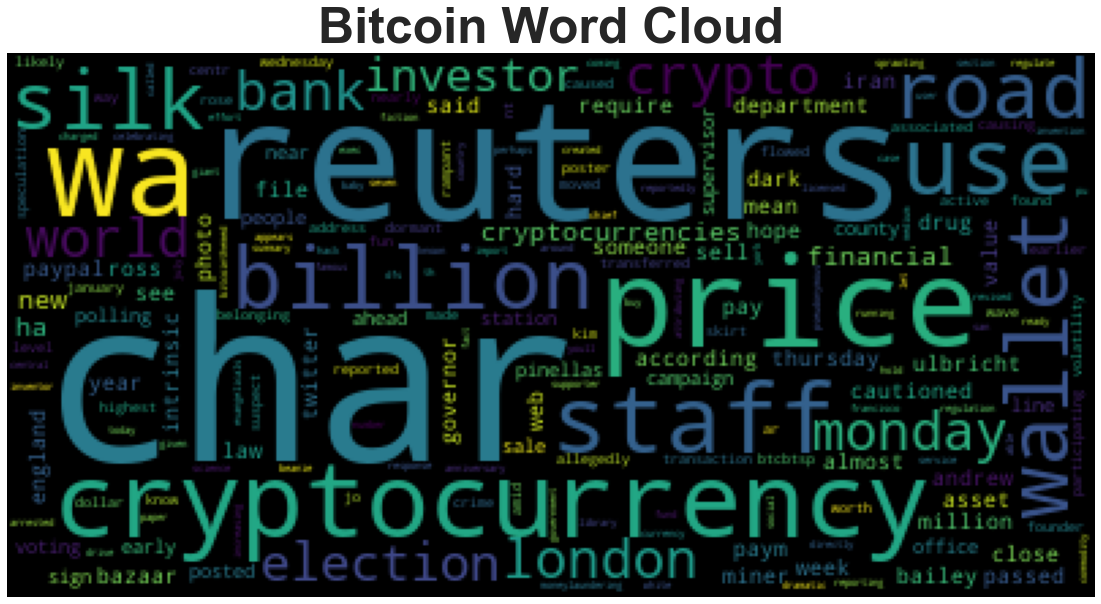

In [23]:
# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in btc_df.Text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

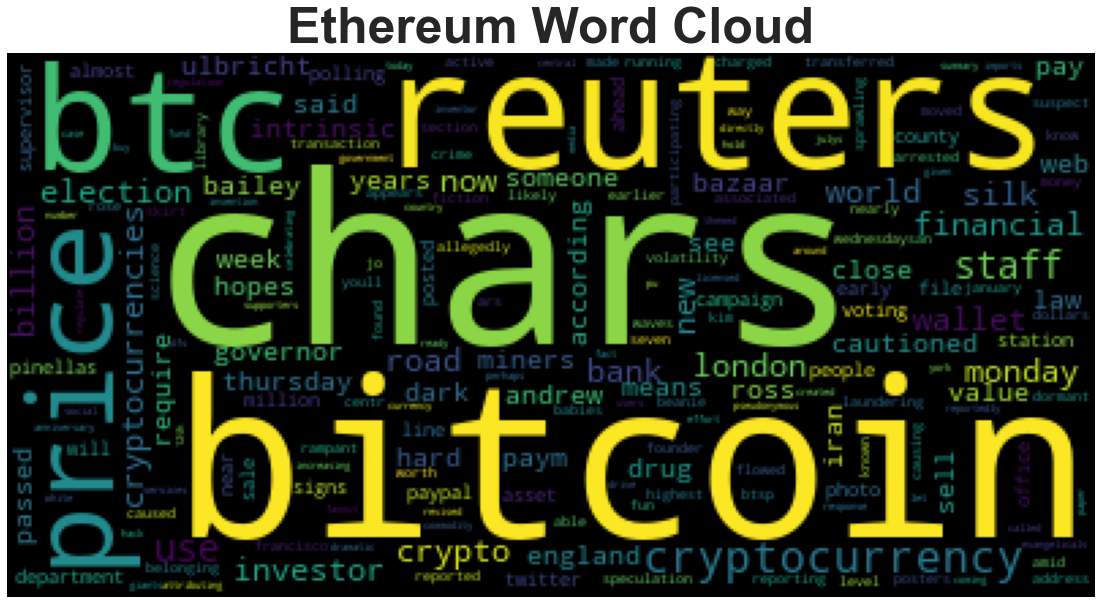

In [24]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.Text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
btc_corpus

"A $1 billion transaction that flowed out of a dormant bitcoin wallet allegedly belonging to Silk Road founder Ross Ulbricht made waves in the crypto world this week, causing some to suspect the found… [+2022 chars]14 with 14 posters participating\r\nOn Wednesday, Ars reported that someone had transferred close to $1 billion in bitcoin out of a wallet likely associated with the Silk Road crime bazaar. Now we know… [+1674 chars]By Reuters Staff\r\nLONDON (Reuters) - Bank of England Governor Andrew Bailey said on Monday it was hard to see how Bitcoin BTC= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]By Reuters Staff\r\nLONDON (Reuters) - Bank of England Governor Andrew Bailey said on Monday it was hard to see how Bitcoin BTC= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]LONDON (Reuters) - Bitcoin's BTC=BTSP price rose to more than $14,900 on Thursday, its highest level since January 2018, amid volatility ca

In [29]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [34]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$1 billion',
 '$157 million',
 '1/',
 '12th',
 '135 million',
 '14',
 '15,500',
 '2015',
 '2018',
 '69,369',
 '8 percent',
 'AP',
 'Alexander Vinnik',
 'Andrew Bailey',
 'Ars',
 'BTC',
 'BTSP',
 'Bank of England',
 'Beanie Babies',
 'Betw',
 'Bitcoin',
 'Bitcoin BTC',
 'Central Bank to Fund Imports',
 'Dan Schulman',
 'FCA',
 'Iran',
 'January 2018',
 'Julys',
 'Kim Jo',
 'LONDON',
 'Monday',
 'New Crypto Law Requires Miners to',
 'PayPal',
 'Pinellas County',
 'Reuters',
 'Ross Ulbricht',
 'Russian',
 'San Francisco',
 'Silk Road',
 'Thursday',
 'Twitter',
 'U.S.',
 'UK',
 'Wednesday',
 'about two years',
 'bitcoin',
 'bitcoin BTC',
 'chars]The New York Department of Financial Services',
 'chars]The US Department of Justice',
 'close to $1 billion',
 'more than $14,900',
 'more than $1bn',
 'nearly a billion dollars',
 'seven years',
 'the Financial Conduct Authority',
 'the Silk Road',
 'the Supervisor of Elections Office',
 'the United States',
 'the last 24 hours',
 'this week',


---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together
eth_corpus

"a $1 billion transaction that flowed out of a dormant bitcoin wallet allegedly belonging to silk road founder ross ulbricht made waves in the crypto world this week, causing some to suspect the found… [+2022 chars]14 with 14 posters participating\r\non wednesday, ars reported that someone had transferred close to $1 billion in bitcoin out of a wallet likely associated with the silk road crime bazaar. now we know… [+1674 chars]by reuters staff\r\nlondon (reuters) - bank of england governor andrew bailey said on monday it was hard to see how bitcoin btc= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]by reuters staff\r\nlondon (reuters) - bank of england governor andrew bailey said on monday it was hard to see how bitcoin btc= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]london (reuters) - bitcoin's btc=btsp price rose to more than $14,900 on thursday, its highest level since january 2018, amid volatility ca

In [36]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"

# Add a title to the document
# YOUR CODE HERE!

In [37]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [38]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$1 billion',
 '$157 million',
 '1/',
 '12th',
 '135 million euros',
 '14',
 '15,500',
 '2015',
 '2018',
 '69,369',
 '8 percent',
 'about two years',
 'alexander vinnik',
 'andrew bailey',
 'bank of england',
 'bitcoin',
 'bitcoin btc',
 'btc',
 'btc=',
 'btsp',
 'central bank',
 'chars]the new york department of financial services',
 'chars]the us department of justice',
 'close to $1 billion',
 'crypto',
 'dan schulman',
 'dfs',
 'iran',
 'january 2018',
 'kim jo',
 'london',
 'monday',
 'more than $14,900',
 'more than $1bn',
 'nearly a billion dollars',
 'pinellas county',
 'reuters',
 'ross ulbricht',
 'russian',
 'san francisco',
 'seven years',
 'the financial conduct authority',
 'the last 24 hours',
 'the united states',
 'this week',
 'thursday',
 'today',
 'twitter',
 'u.s.',
 'uk',
 'wednesday'}